### Importing data from sqlite database

In [8]:
import pandas as pd

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
import sqlite3

In [11]:
con= sqlite3.connect(r"C:\Users\dines\Downloads\database.sqlite")

In [12]:
df= pd.read_sql_query('SELECT* FROM Reviews',con)

In [13]:
df.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

### Performing Sentiment Analysis on Data

 ### What is sentiment analysis?
    Sentiment analysis is the computational task of automatically determining what feelings a writer is expressing in text
    Some examples of applications for sentiment analysis include:

    1.Analyzing the social media discussion around a certain topic
    2.Evaluating survey responses
    3.Determining whether product reviews are positive or negative

    Sentiment analysis is not perfect.It also cannot tell you why a writer is feeling a certain way. However, it can be useful to quickly summarize some qualities of text, especially if you have so much text that a human reader cannot analyze it.For this project,the goal is to to classify Food reviews based on customers' text.

In [14]:
!pip install TextBlob


In [15]:
from textblob import TextBlob


In [16]:
text=df['Summary'][0]

In [17]:
text

'Good Quality Dog Food'

In [18]:
TextBlob(text).sentiment.polarity

0.7

In [19]:
polarity=[]

for i in df['Summary']:
    try:
        polarity.append( TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0)

In [20]:
len(polarity)

568454

In [21]:
data= df.copy()

In [22]:
data['polarity']=polarity

In [23]:
data.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   
3         Cough Medicine  If you are looking for the secret ingredient i...   
4            Great taffy  Great taffy at a great price.  There was a wid...   

   polarity  
0       0.7  
1       0.0  
2       0.0  
3       0.0  
4       0.8

### Perform EDA for positive sentences

In [24]:
data_positive=data[data['polarity']>0]

In [25]:
data_positive.shape

(331665, 11)

In [26]:
!pip install wordcloud

In [224]:
from wordcloud import WordCloud,STOPWORDS

In [28]:
stopwords=set(STOPWORDS)

In [29]:
total_text=(''.join(data_positive['Summary']))

In [30]:
total_text

'Good Quality Dog FoodGreat taffyNice TaffyGreat!  Just as good as the expensive brands!Wonderful, tasty taffyHealthy Dog FoodThe Best Hot Sauce in the WorldMy cats LOVE this "diet" food better than their regular foodMy Cats Are Not Fans of the New Foodfresh and greasy!Love it!GREAT SWEET CANDY!Always freshDelicious product!Great Bargain for the PriceThe Best Hot Sauce in the WorldGreat machine!Best of the Instant OatmealsGood InstantGreat Irish oatmeal for those in a hurry!satisfyingLove Gluten Free Oatmeal!!!GOOD WAY TO START THE DAY....Wife\'s favorite BreakfastWhy wouldn\'t you buy oatmeal from Mcanns? Tastes great!Good Hot BreakfastGreat taste and conveniencegoodVery good but next time I won\'t order the Variety PackHOT!  And good!  Came back for more  :)Roasts up a smooth brewOur guests love it!Awesome Deal!Awsome - Kids in neighborhood loved us!great deal.Better price for this at Targetgreat source of electrolytesGreat for preventing crampsTaste is not so good.How much would you

In [31]:
import re

In [32]:
total_text=re.sub('[^a-zA-Z]',' ',total_text)

In [33]:
total_text=re.sub(' +',' ',total_text)

In [34]:
total_text[0:10000]

'Good Quality Dog FoodGreat taffyNice TaffyGreat Just as good as the expensive brands Wonderful tasty taffyHealthy Dog FoodThe Best Hot Sauce in the WorldMy cats LOVE this diet food better than their regular foodMy Cats Are Not Fans of the New Foodfresh and greasy Love it GREAT SWEET CANDY Always freshDelicious product Great Bargain for the PriceThe Best Hot Sauce in the WorldGreat machine Best of the Instant OatmealsGood InstantGreat Irish oatmeal for those in a hurry satisfyingLove Gluten Free Oatmeal GOOD WAY TO START THE DAY Wife s favorite BreakfastWhy wouldn t you buy oatmeal from Mcanns Tastes great Good Hot BreakfastGreat taste and conveniencegoodVery good but next time I won t order the Variety PackHOT And good Came back for more Roasts up a smooth brewOur guests love it Awesome Deal Awsome Kids in neighborhood loved us great deal Better price for this at Targetgreat source of electrolytesGreat for preventing crampsTaste is not so good How much would you pay for a bag of choco

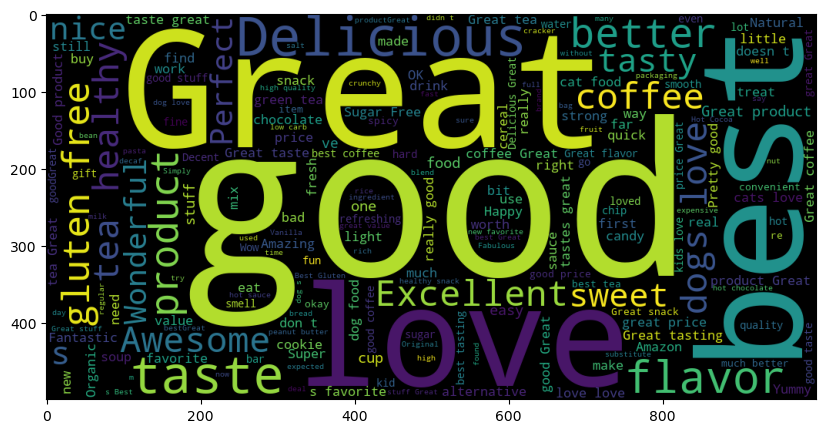

In [36]:
wordcloud= WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_text)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)



### Perform EDA for negative sentences

In [37]:
data_negative=data[data['polarity']<0]

In [38]:
total_text2=(''.join(data_negative['Summary']))

In [39]:
total_text2=re.sub('[^a-zA-Z]',' ',total_text2)

In [40]:
total_text2=re.sub(' +',' ',total_text2)

(-0.5, 999.5, 499.5, -0.5)

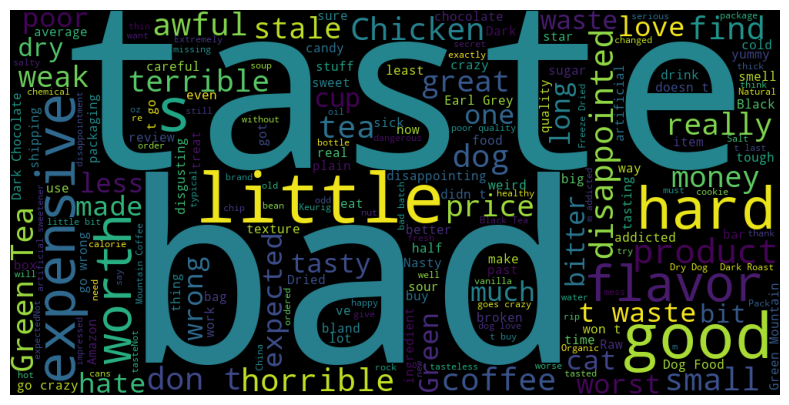

In [41]:
wordcloud2= WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_text2)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud2)
plt.axis('off')


## Analysing what customers amazon should recommend more products.

#### Amazon can recommend more products to only those who are going to buy more or to one who has a better conversion rate,so lets ready data according to this problem statement



In [43]:
df['UserId'].nunique()

256059

In [44]:
df.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

In [48]:
raw=df.groupby('UserId').agg({'Summary':'count','Text':'count','Score':'mean','ProductId':'count'}).sort_values(by='Text',ascending=False)

In [49]:
raw

Summary  Text     Score  ProductId
UserId                                            
A3OXHLG6DIBRW8      448   448  4.535714        448
A1YUL9PCJR3JTY      421   421  4.494062        421
AY12DBB0U420B       389   389  4.647815        389
A281NPSIMI1C2R      365   365  4.841096        365
A1Z54EM24Y40LL      256   256  4.453125        256
...                 ...   ...       ...        ...
A2HROKQO0GA5AF        1     1  3.000000          1
A2HROR28DMJV2W        1     1  5.000000          1
A2HRR8CO2Y20G8        1     1  5.000000          1
A2HRSML93IK9TR        1     1  5.000000          1
AZZZOVIBXHGDR         1     1  2.000000          1

[256059 rows x 4 columns]

In [50]:
raw.columns=['no_of_summary','num_text','avg_score','no_of_prod_purchased']
raw

no_of_summary  num_text  avg_score  no_of_prod_purchased
UserId                                                                  
A3OXHLG6DIBRW8            448       448   4.535714                   448
A1YUL9PCJR3JTY            421       421   4.494062                   421
AY12DBB0U420B             389       389   4.647815                   389
A281NPSIMI1C2R            365       365   4.841096                   365
A1Z54EM24Y40LL            256       256   4.453125                   256
...                       ...       ...        ...                   ...
A2HROKQO0GA5AF              1         1   3.000000                     1
A2HROR28DMJV2W              1         1   5.000000                     1
A2HRR8CO2Y20G8              1         1   5.000000                     1
A2HRSML93IK9TR              1         1   5.000000                     1
AZZZOVIBXHGDR               1         1   2.000000                     1

[256059 rows x 4 columns]

In [51]:
user_10=raw.index[0:10]

In [53]:
num_10=raw['no_of_prod_purchased'][0:10]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

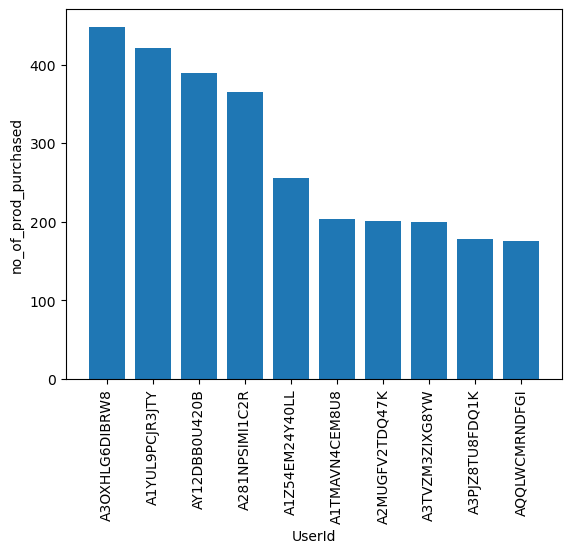

In [55]:
plt.bar(user_10,num_10,label='most recommended user')
plt.xlabel('UserId')
plt.ylabel('no_of_prod_purchased')
plt.xticks(rotation='vertical')

#### These are the Top 10 Users so we can recommend more & more Prodcuts to these Usser Id as there will be a high probability that these person are going to be buy more




### Analyse Length of Comments whether Customers are going to give Lengthy comments or short one


In [189]:
final=df[0:2000]

In [190]:
final.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

In [145]:
final.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [60]:
final.duplicated().sum()

0

In [61]:
len(final['Text'][0].split(' '))

49

In [62]:
def calc_length(text):
    return len(text.split(' '))

In [103]:
final['Text_length']=final['Text'].apply(calc_length)

C:\Users\dines\AppData\Local\Temp\ipykernel_19064\104766925.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [104]:
import plotly.express as px

In [69]:
px.box(final,y='Text_length')

#### Conclusion-->>
    Seems to have Almost 50 percent users are going to give their Feedback limited to 50 words whereas there are only few users who are going give Lengthy Feedbacks

### Analysing score

C:\Users\dines\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Score', ylabel='count'>

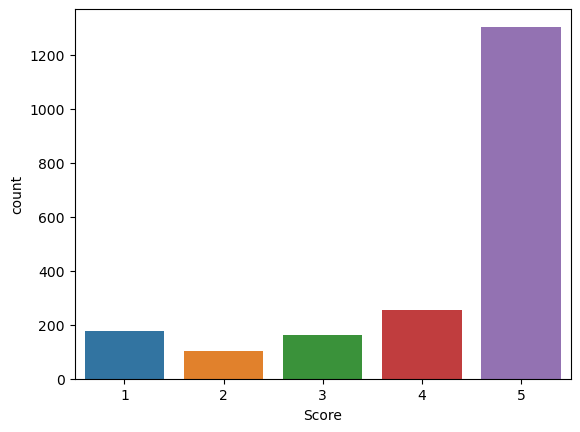

In [68]:
sns.countplot(final['Score'])

### Analysing behavior of customers

### Text preprocessing

In [191]:
final['Text'][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [192]:
final['Text']=final['Text'].str.lower()

C:\Users\dines\AppData\Local\Temp\ipykernel_19064\347651995.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [193]:
data=final['Text'][164]

In [194]:
punctuation= '''@!#$%^*()<:;{}?/[]'''
data= final['Text'][164]
no_punc =''
for char in data:
    if char not in punctuation:
        no_punc=no_punc+char
no_punc
    

'seriously this product was as tasteless as they come. there are much better tasting products out there but at 100 calories its better than a special k bar or cookie snack pack. you just have to season it or combine it with something else to share the flavor.'

In [195]:
import string
punctuations=string.punctuation

def remove_punc(review):
    no_punc =''
    for char in review:
        if char not in punctuations:
            no_punc=no_punc+char
    return no_punc

In [196]:
final['Text']=final['Text'].apply(remove_punc)

C:\Users\dines\AppData\Local\Temp\ipykernel_19064\3160757437.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [197]:
final.head()


Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  i have bought several of the vitality canned d...  
1      Not as Advertised  product arrived labeled as jumbo salted peanut...  
2  "Delight" says it all  this is a confection that has been around a fe...  
3         Cough Medicine  if you are looking for the secret ingredient i...  
4            Great taffy  great taffy at a great price  there was a wide...

In [198]:
import nltk
from nltk.corpus import stopwords

In [199]:
data=final['Text'][164]

In [200]:
data

'seriously this product was as tasteless as they come there are much better tasting products out there but at 100 calories its better than a special k bar or cookie snack pack you just have to season it or combine it with something else to share the flavor'

In [201]:
re=[word for word in data.split(' ') if word not in set(stopwords.words('english'))]

str=' '
for wd in re:
    str=str+wd
    str=str+' '

str

' seriously product tasteless come much better tasting products 100 calories better special k bar cookie snack pack season combine something else share flavor '

In [202]:
def remove_stopword(review):
    return' '.join([word for word in review.split(' ') if word not in set(stopwords.words('english'))])

In [203]:
final['Text']=final['Text'].apply(remove_stopword)

C:\Users\dines\AppData\Local\Temp\ipykernel_19064\2450641523.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [232]:
final['Text'][45]

'seems little wholesome supermarket brands somewhat mushy doesnt quite much flavor either  didnt pass muster kids probably wont buy'

In [233]:
final['Text'].str.contains('http').sum()

0

In [162]:
pd.set_option('display.max_row',2000)
final['Text'].str.contains('http')


0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21       True
22      False
23      False
24      False
25       True
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39       True
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

In [205]:
review=final['Text'][21]

In [206]:
review

'bought husband currently overseas loves apparently staff likes alsobr generous amounts twizzlers 16ounce bag well worth price hrefhttpwwwamazoncomgpproductb001gvisjmtwizzlers strawberry 16ounce bags pack 6a'

In [207]:
import re

In [208]:
url_pattern=re.compile(r'href|http.\w+')
url_pattern.sub(r'',review)

'bought husband currently overseas loves apparently staff likes alsobr generous amounts twizzlers 16ounce bag well worth price  strawberry 16ounce bags pack 6a'

In [209]:
def remove_url(review):
    url_pattern=re.compile(r'href|http.\w+')
    return url_pattern.sub(r'',review)

In [211]:
final['Text']=final['Text'].apply(remove_url)

C:\Users\dines\AppData\Local\Temp\ipykernel_19064\2265483748.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [212]:
final['Text'][34]

'instant oatmeal become soggy minute water hits bowl mccanns instant oatmeal holds texture excellent flavor good time mccanns regular oat meal excellent may take bit longer prepare time morning best instant brand ive ever eaten close second noninstant varietybr br mccanns instant irish oatmeal variety pack regular apples  cinnamon maple  brown sugar 10count boxes pack 6'

In [216]:
final['Text'][34].replace(' br ','')

'instant oatmeal become soggy minute water hits bowl mccanns instant oatmeal holds texture excellent flavor good time mccanns regular oat meal excellent may take bit longer prepare time morning best instant brand ive ever eaten close second noninstant varietybrmccanns instant irish oatmeal variety pack regular apples  cinnamon maple  brown sugar 10count boxes pack 6'

In [259]:
for i in range (len(final['Text'])):
    final['Text'][i].replace(' br ','')
    

In [260]:
final.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  bought several vitality canned dog food produc...  
1      Not as Advertised  product arrived labeled jumbo salted peanutsth...  
2  "Delight" says it all  confection around centuries  light pillowy cit...  
3         Cough Medicine  looking secret ingredient robitussin believe f...  
4            Great taffy  great taffy great price  wide assortment yummy...

In [261]:
comment_words=' '.join(final['Text'])

In [262]:
stopwords=set(STOPWORDS)

(-0.5, 999.5, 499.5, -0.5)

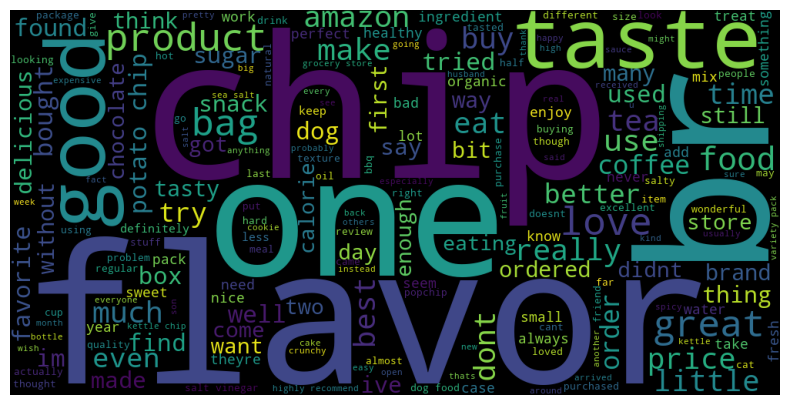

In [266]:
wordcloud3= WordCloud(width=1000,height=500,stopwords=stopwords).generate(comment_words)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud3)
plt.axis('off')

